In [36]:
import librosa
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

audio_path = 'audio/fold1/7383-3-0-1.wav' # dog_bark

x , sr = librosa.load(audio_path) # Carga las muestras digitales de audio
print(type(x), type(sr))
print(x.shape)
print(x.size)
print(sr)
print(x.dtype)

print(x[1:20])
# # Decimate
# x_dec = x[1:88200:3]
# print(x_dec)
# print(x_dec.size)

<class 'numpy.ndarray'> <class 'int'>
(88200,)
88200
22050
float32
[ 0.02311585  0.01839567  0.01807018  0.01396454  0.01199517  0.00769883
  0.00496818  0.00093294 -0.00205284 -0.00561158 -0.00799542 -0.0100408
 -0.01201169 -0.01318102 -0.01373196 -0.0145921  -0.01564049 -0.01599623
 -0.01657267]


In [37]:
 # IIR filter
# Coeficientes [num, den]
sos1 = [0.757076375333885,-1.51415275066777,0.757076375333885,1,-1.45424358625159,0.574061915083955]
# x impulso, en su lugar x la que toca
# x = signal.unit_impulse(700)
# filtra, y es la señal filtrada
x1 = signal.sosfilt(sos1, x)

x_dec = x1[1:88200:3]
# print(x_dec)
# print(x_dec.size)

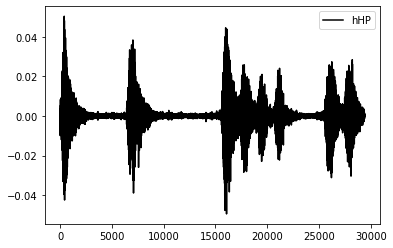

In [38]:
# High Filter
# Coeficientes [num, den]
sos2 = [0.757076375333885,-1.51415275066777,0.757076375333885,1,-1.45424358625159,0.574061915083955]
# x impulso, en su lugar x la que toca
# x = signal.unit_impulse(700)
# filtra, y es la señal filtrada
y2 = signal.sosfilt(sos2, x_dec)
plt.plot(y2, 'k', label='hHP')
plt.legend(loc='best')
plt.show()

In [ ]:
# Seguimos
# Lp_Pa es la longitud del vector p
# 0.25 segundos en fs
windowSize = 4000
# Solapamiento del 50% 
L_overlap = 2000
# Trozo que avanza 
Lavanza = 2000
# Longitud de xdec: Lxo/3 = 64000
Lxdec = 64000
# Numero de segmentos de 0.250 s que hay en 4 segundos (con solape)
Nseg = 31
# Inicializa LTotal 
LTotal = np.zeros(Nseg)

if fs != -1:
    T = N*Lavanza/fs
else:
    T = N*Lavanza
for n in LTotal:
    Segmento = p[np.arange((n-1)*Lavanza,(n-1)*Lavanza+windowSize)]
    p_rms[n-1] = m.sqrt(np.mean(np.power(Segmento,2.0)))
    # print(p_rms[n-1])

# Calcula la presion en dB
spl = 20.0 * np.log10(p_rms/ref); 